u.shape:(3456, 3456), s.shape:(3456,), v.shape:(3456, 5184)
Variance Explained by Top 20 singular values:
[9.80147e-01 1.01810e-02 2.78900e-03 1.79300e-03 5.95000e-04 4.63000e-04
 3.69000e-04 2.41000e-04 2.01000e-04 1.71000e-04 1.45000e-04 1.34000e-04
 1.14000e-04 9.20000e-05 8.40000e-05 8.10000e-05 7.70000e-05 6.80000e-05
 6.40000e-05 5.90000e-05]


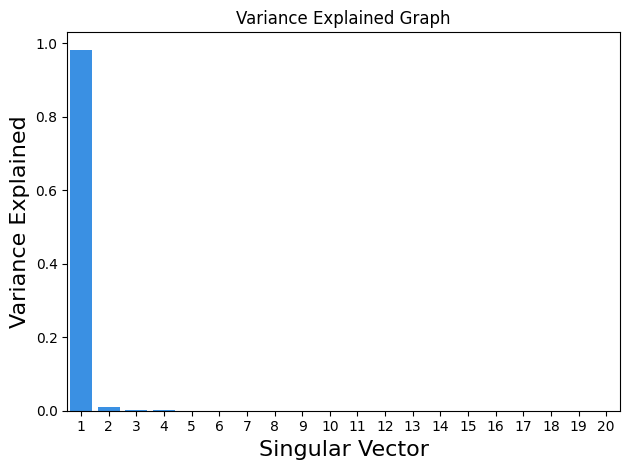

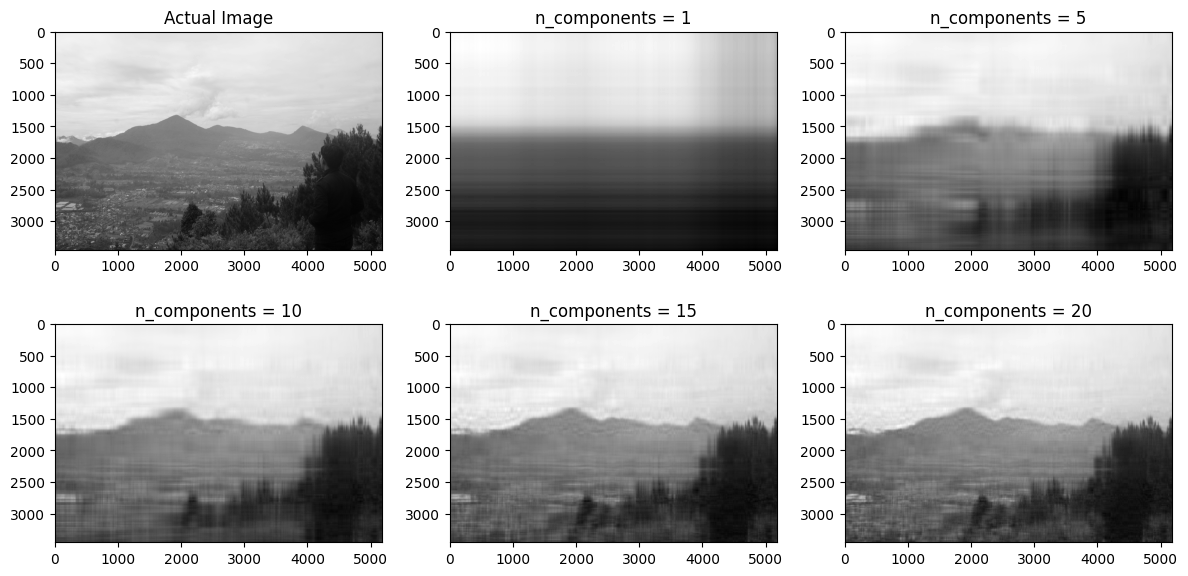

In [2]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directory to save images
output_dir = "output_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# URL of the image
url = 'https://raw.githubusercontent.com/HilmanAmrullah/p_citra/main/gambar/pemandangan.jpg'
response = requests.get(url, stream=True)

if response.status_code == 200:
    with open('pemandangan.jpg', 'wb') as f:
        f.write(response.content)

    img = cv2.imread('pemandangan.jpg')

    if img is not None:
        # Convert the image from BGR to RGB format
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Converting the image into gray scale for faster computation.
        gray_image = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

        # Calculating the SVD
        u, s, v = np.linalg.svd(gray_image, full_matrices=False)

        # Inspect shapes of the matrices
        print(f'u.shape:{u.shape}, s.shape:{s.shape}, v.shape:{v.shape}')

        var_explained = np.round(s**2/np.sum(s**2), decimals=6)

        # Variance explained top Singular vectors
        print(f'Variance Explained by Top 20 singular values:\n{var_explained[0:20]}')

        sns.barplot(x=list(range(1, 21)), y=var_explained[0:20], color="dodgerblue")

        plt.title('Variance Explained Graph')
        plt.xlabel('Singular Vector', fontsize=16)
        plt.ylabel('Variance Explained', fontsize=16)
        plt.tight_layout()
        plt.show()

        # Plot images with different number of components
        comps = [3648, 1, 5, 10, 15, 20]
        plt.figure(figsize=(12, 6))

        for i in range(len(comps)):
            if i == 0:
                low_rank = gray_image
            else:
                low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]

            plt.subplot(2, 3, i + 1)
            plt.imshow(low_rank, cmap='gray')
            if i == 0:
                plt.title('Actual Image')
                plt.savefig(os.path.join(output_dir, 'actual_image_gray.png'))
            else:
                plt.title(f'n_components = {comps[i]}')
                plt.savefig(os.path.join(output_dir, f'n_components_{comps[i]}_gray.png'))

        plt.tight_layout()
        plt.show()

    else:
        print("Failed to load the image using OpenCV.")
else:
    print(f"Failed to retrieve the image. HTTP Status code: {response.status_code}")
